<a href="https://colab.research.google.com/github/axellnd/Int.-Red-Neu./blob/main/Actividad_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad 6: Redes Neuronales
Axel Moises Espinoza Lindoro 2002721 N4

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [ ]:
#Importar datos
mnist_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
(train_images, train_labels), (test_images, test_labels) = mnist_data

In [ ]:
class_names = ['cero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine','ten']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

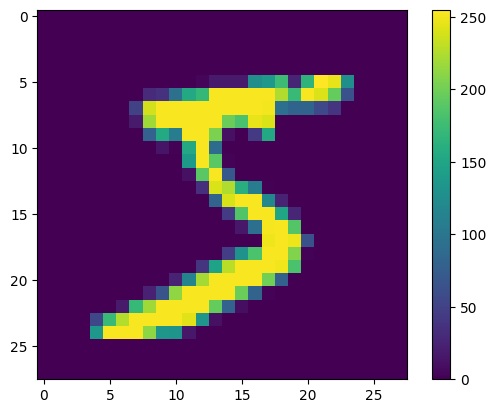

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

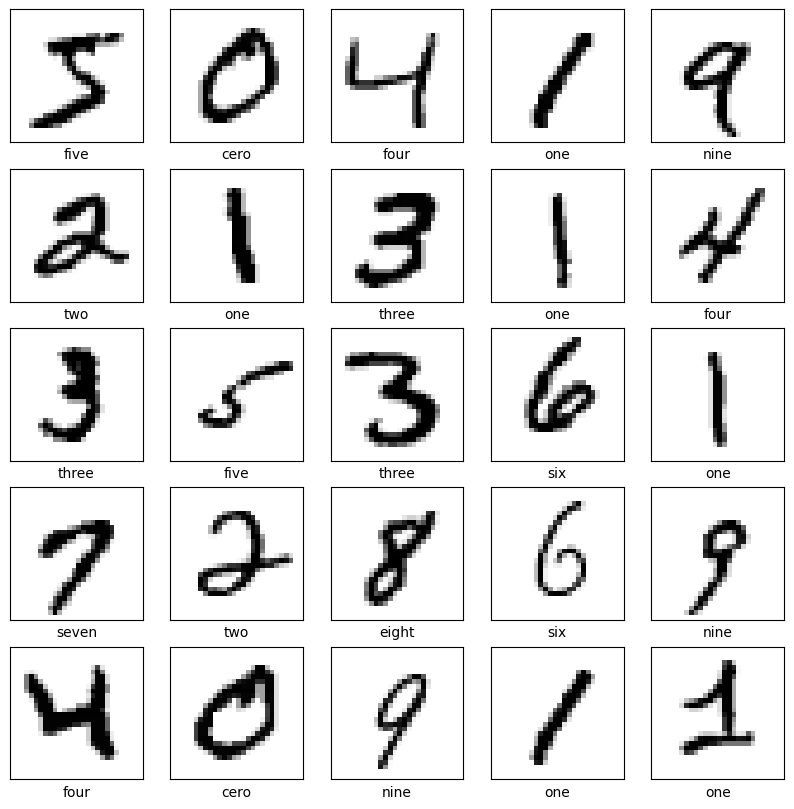

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#Generar modelo
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (1, 1), activation='relu', input_shape=(28, 28,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (1, 1), activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 37s 19ms/step - loss: 0.4154 - accuracy: 0.8661
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2440 - accuracy: 0.9212
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2019 - accuracy: 0.9344
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1802 - accuracy: 0.9410
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1632 - accuracy: 0.9459
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1498 - accuracy: 0.9505
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1404 - accuracy: 0.9524
Epoch 8/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1309 - accuracy: 0.9561
Epoch 9/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1251 - accuracy: 0.9582
Epoch 10/10
1875/1875 [==============================] - 30s 16ms/step - lo

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.1376 - accuracy: 0.9570 - 2s/epoch - 7ms/step

Test accuracy: 0.9570000171661377


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 5ms/step


In [ ]:
predictions[0]

array([2.5128660e-10, 2.3369672e-08, 2.6858215e-06, 4.7387657e-06,
       4.1001089e-10, 5.8934408e-08, 2.2881514e-14, 9.9998885e-01,
       7.5023650e-07, 2.6550372e-06], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
test_labels[0]

7

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


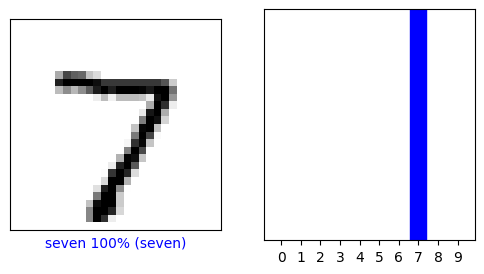

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

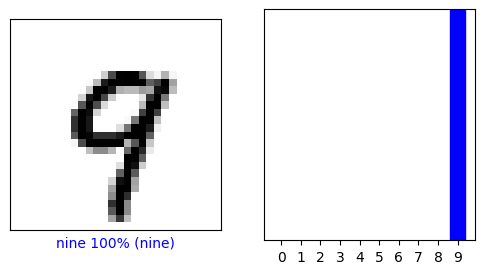

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

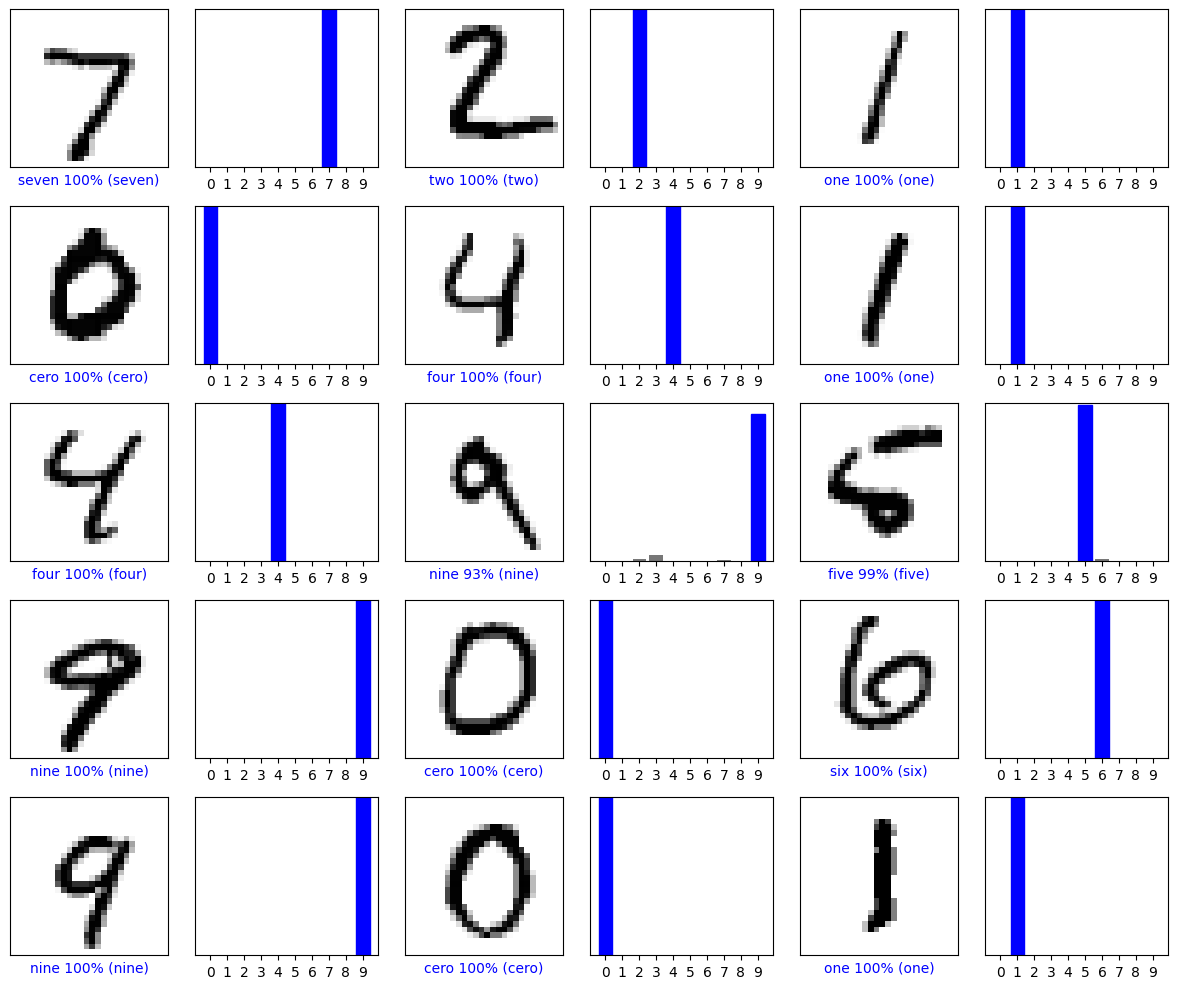

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 26ms/step
[[5.3819713e-09 6.0837781e-05 9.9987376e-01 6.4025116e-05 5.4383793e-15
  1.2197676e-06 2.2962366e-08 8.0427496e-09 8.4500932e-08 3.5869013e-10]]


In [ ]:
np.argmax(predictions_single[0])

2


¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?

** Fue el mismo número de epocas de entrenamiento que se realizaron anteriormente**

¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?

** Sí se notó una mejoría con este modelo respecto al anterior, porque tuvo más certeza en sus predicciones **